In [1]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

from keras.datasets import mnist
#download mnist data and split into train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

Using TensorFlow backend.


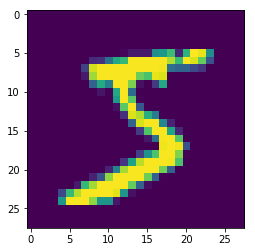

In [2]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

In [3]:

X_train[0].shape

(28, 28)

In [0]:
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [0]:
X_train_norm = X_train.astype('float32')
X_test_norm = X_test.astype('float32')
X_train_norm = X_train_norm/255.0
X_test_norm = X_test_norm/255.0

In [6]:
from keras.utils import to_categorical

Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [0]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val = train_test_split(X_train_norm,Y_train,test_size=0.2,random_state = 4)

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from keras.optimizers import SGD

model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [9]:
opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [10]:
model.fit(x_train, y_train, validation_data=(x_val,y_val), epochs=5)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 31s 650us/step - loss: 0.2056 - acc: 0.9411 - val_loss: 0.0936 - val_acc: 0.9732
Epoch 2/5
48000/48000 [==============================] - 31s 647us/step - loss: 0.0726 - acc: 0.9794 - val_loss: 0.0782 - val_acc: 0.9775
Epoch 3/5
48000/48000 [==============================] - 31s 638us/step - loss: 0.0533 - acc: 0.9839 - val_loss: 0.0692 - val_acc: 0.9795
Epoch 4/5
48000/48000 [==============================] - 31s 637us/step - loss: 0.0428 - acc: 0.9873 - val_loss: 0.0691 - val_acc: 0.9791
Epoch 5/5
48000/48000 [==============================] - 30s 635us/step - loss: 0.0349 - acc: 0.9889 - val_loss: 0.0644 - val_acc: 0.9813


In [11]:
Y_pred = model.predict_classes(X_test_norm[:4])
print(Y_pred)

[7 2 1 0]


In [12]:
scores = model.evaluate(X_test_norm, Y_test)
print("Accuracy:",scores[1]*100 ,"%")

10000/10000 [==============================] - 2s 183us/step
Accuracy: 98.2 %
